In [1]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia.record import Record, load_file
from antlia.dtype import load_converted_record
from antlia import plot_braking as braking
from antlia import dtc
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [2]:
with open('../config.p', 'rb') as f:
        bicycle_calibration = pickle.load(f)

bicycle_record_files = [
    '2018-04-23_12-30-38.csv',
    '2018-04-23_13-13-36.csv',
    '2018-04-23_14-22-58.csv',
    '2018-04-23_15-27-48.csv',
    '2018-04-23_16-32-27.csv',
    '2018-04-23_17-14-00.csv',
    '2018-04-25_09-27-24.csv',
    '2018-04-25_10-20-28.csv',
    '2018-04-25_11-34-04.csv',
    '2018-04-25_12-41-48.csv',
    '2018-04-25_14-14-57.csv',
    '2018-04-25_14-49-39.csv',
    '2018-04-25_16-15-57.csv',
    '2018-04-25_17-23-04.csv',
    '2018-04-26_11-19-31.csv',
    '2018-04-26_14-50-53.csv',
    '2018-04-27_14-59-52.csv'
]

lidar_record_files = [
    '2018-04-23-12-17-37_0.pkl.gz',
    '2018-04-23-13-01-00_0.pkl.gz',
    '2018-04-23-14-10-33_0.pkl.gz',
    '2018-04-23-15-15-14_0.pkl.gz',
    '2018-04-23-16-19-35_0.pkl.gz',
    '2018-04-23-17-01-24_0.pkl.gz',
    '2018-04-25-09-15-00_0.pkl.gz',
    '2018-04-25-10-07-31_0.pkl.gz',
    '2018-04-25-11-21-29_0.pkl.gz',
    '2018-04-25-12-29-06_0.pkl.gz',
    '2018-04-25-14-02-15_0.pkl.gz',
    '2018-04-25-14-36-55_0.pkl.gz',
    '2018-04-25-16-03-24_0.pkl.gz',
    '2018-04-25-17-10-07_0.pkl.gz',
    '2018-04-26-11-07-38_0.pkl.gz',
    '2018-04-26-14-38-03_0.pkl.gz',
    '2018-04-27-14-47-07_0.pkl.gz',
    '2018-04-27-15-39-56_0.pkl.gz'
]

records = []
data_dir = '../../data/comfort'
i = 0
for file1, file2 in zip(bicycle_record_files, lidar_record_files):
    r1 = load_file(os.path.join(data_dir, file1), bicycle_calibration['convbike'])
    r2 = load_converted_record(os.path.join(data_dir, file2))
    r = Record(r2, r1)
    records.append(r)
    print('loaded record from files: {}, {}'.format(file1, file2))
    i += 1
    if i >= 8:
        break

loaded record from files: 2018-04-23_12-30-38.csv, 2018-04-23-12-17-37_0.pkl.gz
loaded record from files: 2018-04-23_13-13-36.csv, 2018-04-23-13-01-00_0.pkl.gz
loaded record from files: 2018-04-23_14-22-58.csv, 2018-04-23-14-10-33_0.pkl.gz
loaded record from files: 2018-04-23_15-27-48.csv, 2018-04-23-15-15-14_0.pkl.gz
loaded record from files: 2018-04-23_16-32-27.csv, 2018-04-23-16-19-35_0.pkl.gz
loaded record from files: 2018-04-23_17-14-00.csv, 2018-04-23-17-01-24_0.pkl.gz
loaded record from files: 2018-04-25_09-27-24.csv, 2018-04-25-09-15-00_0.pkl.gz
loaded record from files: 2018-04-25_10-20-28.csv, 2018-04-25-10-07-31_0.pkl.gz


In [3]:
# notes on missing syncs and repeated trials
missing_sync = [
   [680], None, None, None, None,
   None, None, None, None, None,
   None, None, None, None, None,
   None, None
]

trial_mask = [
   None, None, 0, None, None,
   0, None, None, 9, None,
   None, 11, 8, 9, None,
   None, None
]

#assert len(missing_sync) == len(records)

for i, (r, ms, tm) in enumerate(zip(records, missing_sync, trial_mask)):
    print('calculating trials for cyclist', i)
    
    try:
        r.sync()
        r._calculate_trials2(missing_sync=ms, trial_mask=tm)
    except (AssertionError, ValueError) as e:
        print('unable to calculate trials for cyclist', i)
        print(e)

calculating trials for cyclist 0
calculating trials for cyclist 1


../antlia/trial2.py:1116: UserWarning: Unable to detect cyclist exiting or braking for event ending at t = 689.011 seconds
  warnings.warn(msg, UserWarning)


calculating trials for cyclist 2
calculating trials for cyclist 3
calculating trials for cyclist 4
calculating trials for cyclist 5
calculating trials for cyclist 6
calculating trials for cyclist 7


In [4]:
%matplotlib inline

plt.close('all')

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        pattern = None
        if (i, j) == (6, 11):
            # hardcode pattern for (6, 11)
            pattern=(0, -1, 0, 1, 0, -1, 0, 1, 0)
            
        try:
            tr.event._identify_steer_slice(pattern=pattern)
        except TypeError as e:
            if e.args == ('Incorrect EventType',):
                pass
            else:
                raise e
        #else:
        #    tr.event.plot_steer_identification(figsize=(12, 24))
        #    plt.show()

/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/scipy/signal/windows.py:1379: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "
../antlia/trial2.py:569: UserWarning: First frequency minimum exceeds 0.4 and has been replaced with 0.1
  warnings.warn(msg)


steer identification for rider 2 trial 9


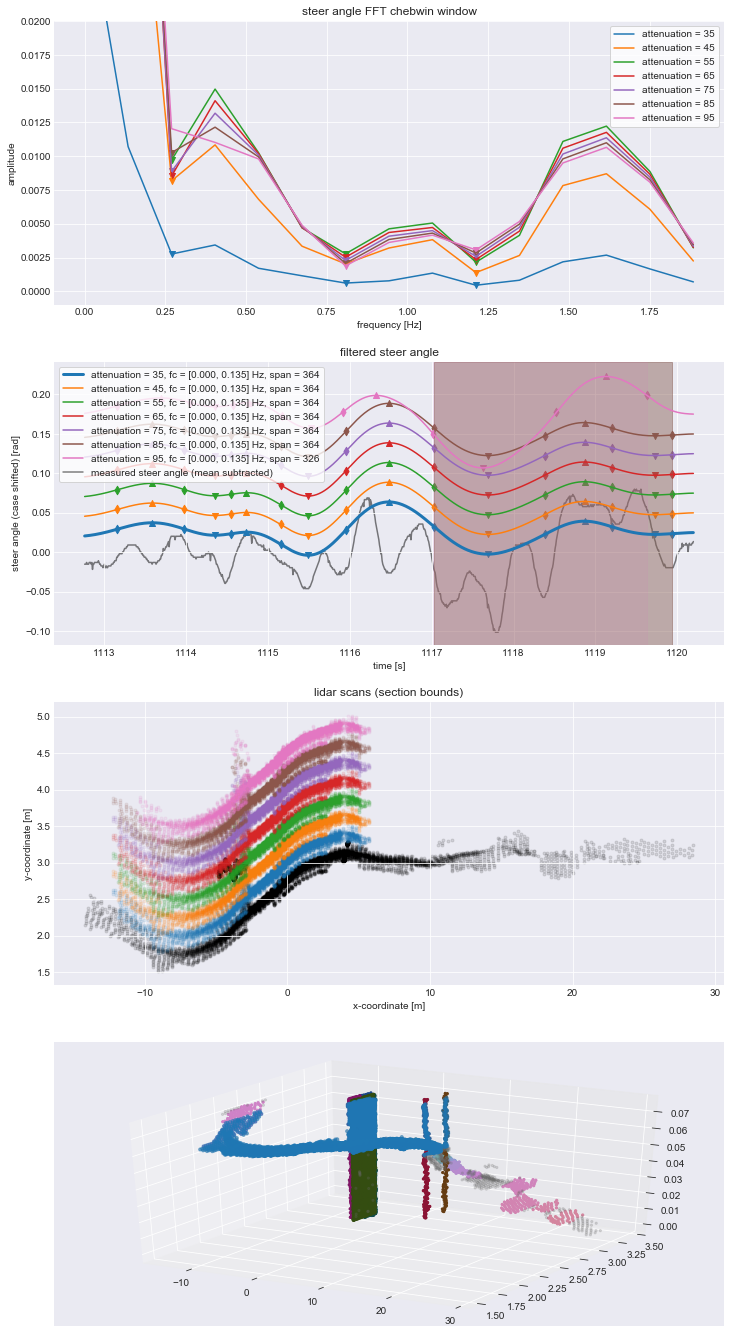

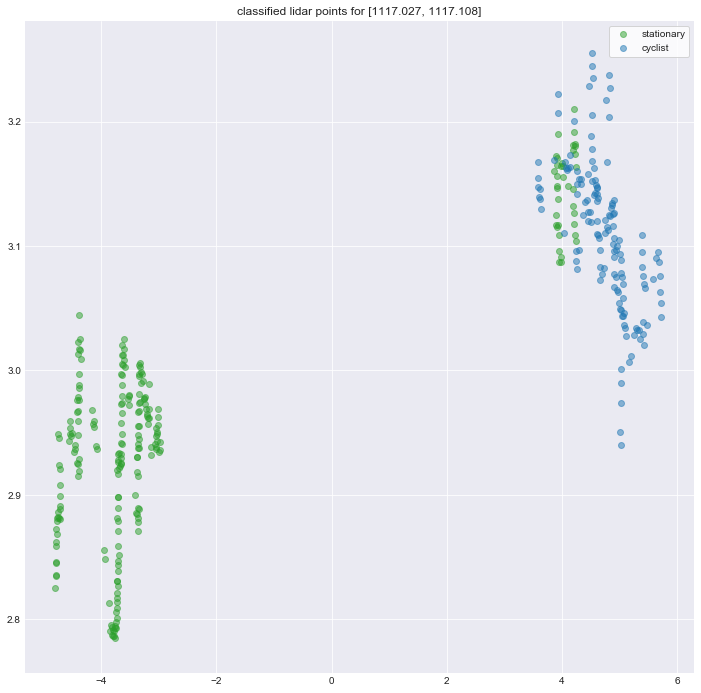

steer identification for rider 3 trial 7


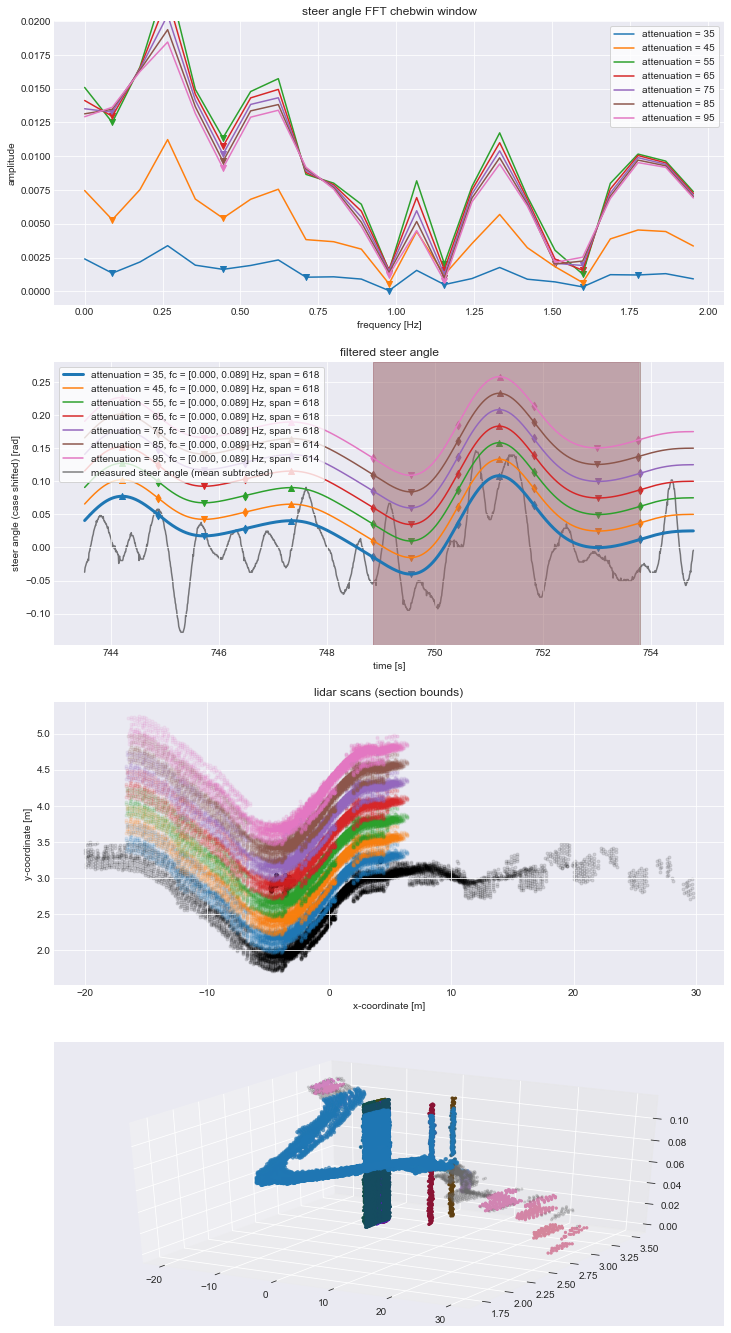

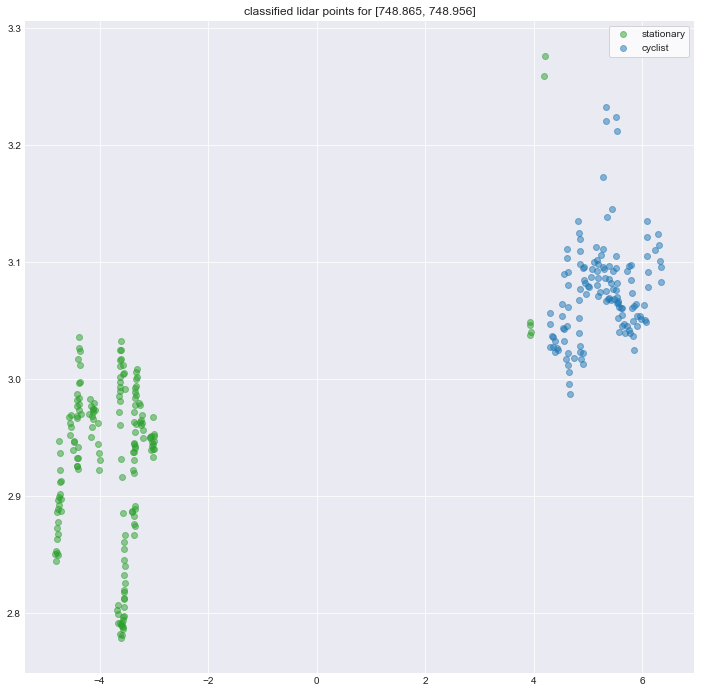

In [5]:
review_set = {
    (2, 9),
    (3, 7)
}
colors = sns.color_palette('tab10', 10)

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        if (i, j) not in review_set:
            continue
            
        print('steer identification for rider {} trial {}'.format(i, j))
        evt = tr.event
        if evt.si is not None:
            evt.plot_steer_identification(figsize=(12, 24))
        
            z0 = evt.z.min()
            z1 = evt.z.max()
            t0 = evt.lidar.time[0]
            t1 = evt.lidar.time[-1]
    
            tstart = evt.bicycle.time[evt.steer_slice][0]
            tstop = evt.lidar.time[evt.lidar.frame_index(tstart) + 1][0]
            zstart, zstop = np.interp([tstart, tstop], [t0, t1], [z0, z1])
            index = (evt.z.data < zstart) | (evt.z.data > zstop)
            
            x = evt.x.copy()
            y = evt.y.copy()
            
            fig, ax = plt.subplots(figsize=(12, 12))
            x.mask = evt.bb_mask | ~evt.stationary_mask | index
            y.mask = evt.bb_mask | ~evt.stationary_mask | index
            ax.scatter(x, y, color=colors[2], alpha=0.5, label='stationary')
            x.mask = evt.bb_mask | evt.stationary_mask | index
            y.mask = evt.bb_mask | evt.stationary_mask | index
            ax.scatter(x, y, color=colors[0], alpha=0.5, label='cyclist')
            ax.legend()
            ax.set_title('classified lidar points for [{:0.3f}, {:0.3f}]'.format(tstart, tstop))
            
            plt.show()

In [154]:
from antlia import trial2

def lateral_clearance(event, ax=None, trajectory_bbmask=None):
    color = sns.color_palette('tab10', 10)
    
    # obstacle
    x = event.x.copy()
    y = event.y.copy()
    x.mask = ~event.stationary_mask | event.bb_mask
    y.mask = ~event.stationary_mask | event.bb_mask
    mask = ((x > trial2.OBSTACLE_BB['xlim'][1]) |
            (x < trial2.OBSTACLE_BB['xlim'][0]) |
            (y > trial2.OBSTACLE_BB['ylim'][1]) |
            (y < trial2.OBSTACLE_BB['ylim'][0]))
    x[mask] = np.ma.masked
    x[mask] = np.ma.masked
    y[mask] = np.ma.masked
    y[mask] = np.ma.masked
    if ax is not None:
        ax.scatter(x, y, color=color[0], label='obstacle point cloud')
    
    x0 = x.max()
    y0 = y.mean()
    
    x, y = event.trajectory(mode='raw', bbmask=trajectory_bbmask)
    mask = ((x > trial2.OBSTACLE_BB['xlim'][1]) |
            (x < trial2.OBSTACLE_BB['xlim'][0]) |
            (y > trial2.OBSTACLE_BB['ylim'][1]) |
            (y < trial2.OBSTACLE_BB['ylim'][0]))
    x[~mask] = np.ma.masked
    y[~mask] = np.ma.masked

    index = (x > trial2.OBSTACLE_BB['xlim'][0]) & (x < trial2.OBSTACLE_BB['xlim'][1])
    if ax is not None:
        ax.scatter(x[index], y[index], color=color[1], label='centroid trajectory')
        ax.plot(x[index], y[index], color=color[1])
    
    xi = x[index].compressed()[::-1]
    yi = y[index].compressed()[::-1]
    assert np.all(np.diff(xi) > 0)
    
    yy = np.interp(x0, xi, yi)
    dy = y0 - yy
    if ax is not None:
        ax.plot([x0, x0], [y0, yy], color=color[3], label='lateral clearance')
        ax.legend()
        
    return dy, (x0, y0), yy
    
plt.close('all')

failure = []
for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        if tr.event.type.value == 0:
            continue
            
        try:
            lateral_clearance(tr.event)
        except AssertionError:
            failure.append((i, j))
            
print('errors in trajectory estimation for:')
print(failure)

errors in trajectory estimation for:
[(1, 2), (3, 14)]


In [187]:
records[1].trials[2].event.z.shape

(182, 1521)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1da4ee208>)

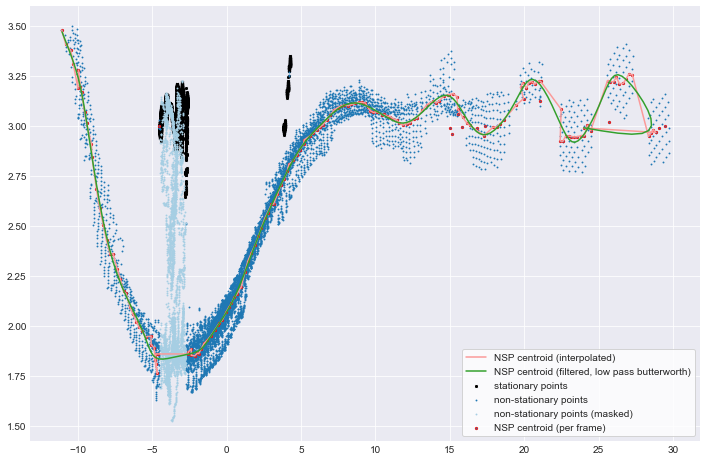

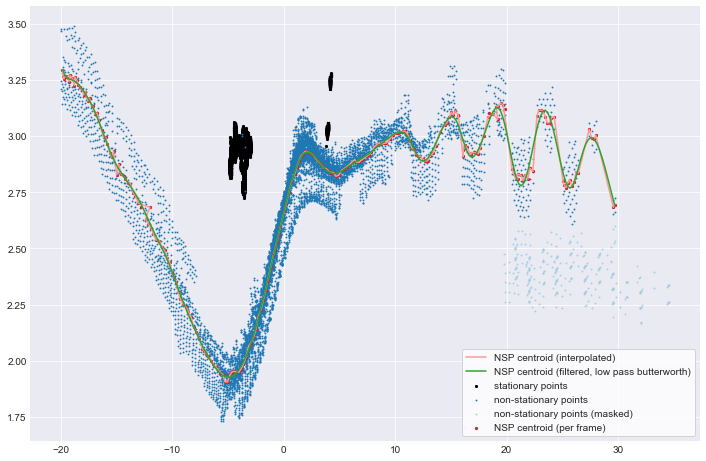

In [196]:
%matplotlib inline
records[1].trials[2].event.plot_trajectory(
    plot_vel=False,
    bbmask={
        'xlim': (-4.5, -2.75),
        'ylim': (0, 10)
    },
    figsize=(12, 8)
)
records[3].trials[14].event.plot_trajectory(
    plot_vel=False,
    bbmask={
        'xlim': (10, 40),
        'ylim': (0, 2.6)
    },
    figsize=(12, 8)
)

AssertionError: 

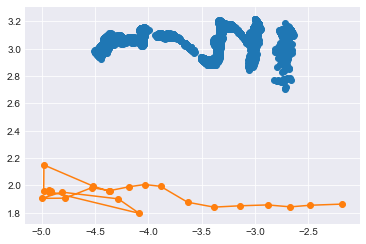

In [168]:
fig, ax = plt.subplots()
print(lateral_clearance(records[1].trials[2].event,
                        ax=ax,
                        trajectory_bbmask={
                            'xlim': (-4.25, -2.75),
                            'ylim': (2, 10)
                        }))
print(lateral_clearance(records[3].trials[14].event,
                        ax=ax,
                        trajectory_bbmask={
                            'xlim': (10, 40),
                            'ylim': (0, 2.6)
                        }))

In [94]:
from antlia import filter as ff
import pandas as pd

d = {
    'rider id': [],
    'trial id': [],
    'start index': [],
    'starting velocity': [],
    'event amplitude': [],
    'event duration': [],
    'distance-to-collision': [],
    'time-to-collision': [],
    'pattern length': [],
    'lateral clearance': [],
}

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        evt = tr.event
        if evt.steer_slice is not None:
            t0 = evt.bicycle.time[evt.steer_slice.start]
            dtc = evt.calculate_dtc(t0)
            k = evt.steer_slice.start
            filtered_v = ff.moving_average(evt.bicycle.speed,
                                           window_size=55,
                                           sigma=55/2)
            v0 = filtered_v[k]
            ttc = dtc/v0
            
            duration, amplitude, length = evt._calculate_steer_event_metrics()
            
            dy = lateral_clearance(evt)[0]
            
            d['rider id'].append(i)
            d['trial id'].append(j)
            d['start index'].append(k)
            d['starting velocity'].append(v0)
            d['distance-to-collision'].append(evt.calculate_dtc(t0))
            d['time-to-collision'].append(ttc)
            d['event amplitude'].append(amplitude)
            d['event duration'].append(duration)
            d['pattern length'].append(length)
            d['lateral clearance'].append(dy)
            
            #k = evt.lidar.frame_index(t0)
            #fig, ax = evt._plot_closest_pair(k, figsize=(12, 12))
            #plt.show()
            
df = pd.DataFrame(data=d)

In [95]:
cols = [
    'rider id',
    'trial id',
    'start index',
    'starting velocity',
    'event amplitude',
    'event duration',
    'pattern length',
    'lateral clearance',
    'distance-to-collision',
    'time-to-collision',
]
df = df[cols]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'float_format', '{:0.3f}'.format):
    display(df)

,rider id,trial id,start index,starting velocity,event amplitude,event duration,pattern length,lateral clearance,distance-to-collision,time-to-collision
0,0,3,733,3.828,0.187,6.129,7,0.604,10.470,2.735
1,0,4,529,6.606,0.170,2.464,7,0.881,4.693,0.710
2,0,5,675,4.942,0.122,3.432,7,0.882,5.666,1.147
3,0,9,547,4.978,0.108,4.073,7,0.859,9.370,1.882
4,0,10,485,6.449,0.094,3.368,7,0.811,7.699,1.194
5,0,11,920,3.618,0.189,4.361,7,1.009,5.803,1.604
6,0,15,430,6.255,0.110,3.244,7,0.883,7.120,1.138
7,0,16,584,4.947,0.100,4.201,7,0.889,8.513,1.721
8,0,17,910,3.640,0.160,4.785,7,0.916,5.452,1.498
9,1,0,992,3.499,0.311,4.169,7,0.972,4.923,1.407


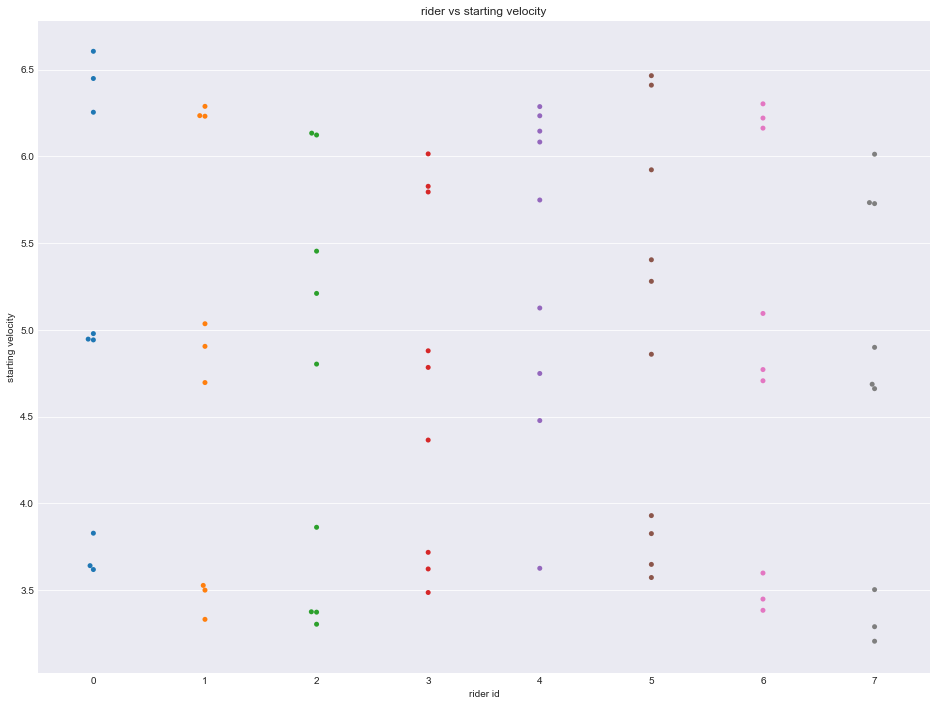

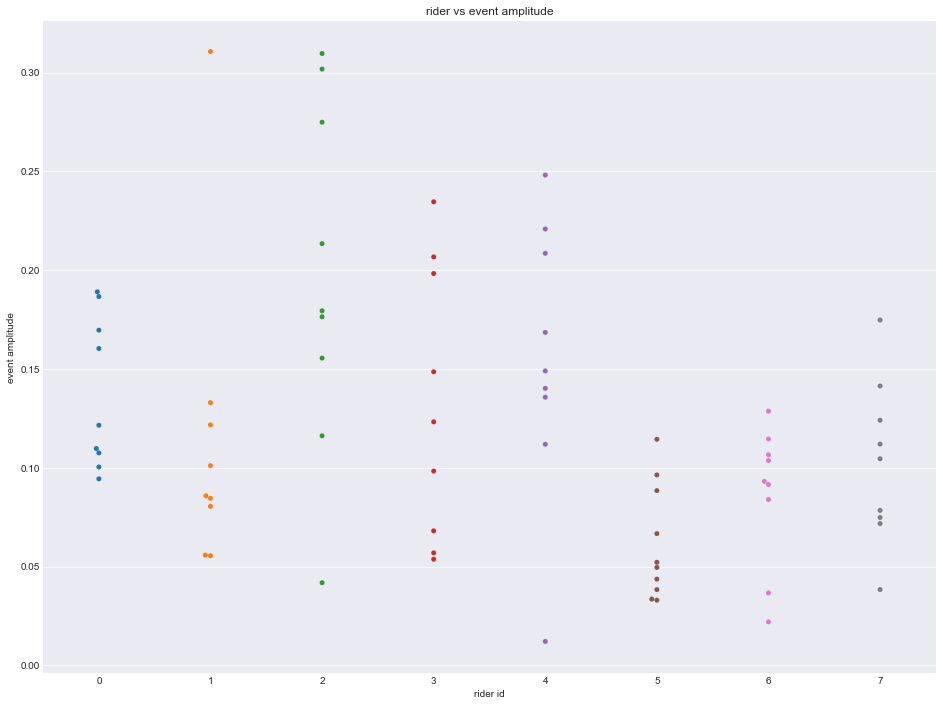

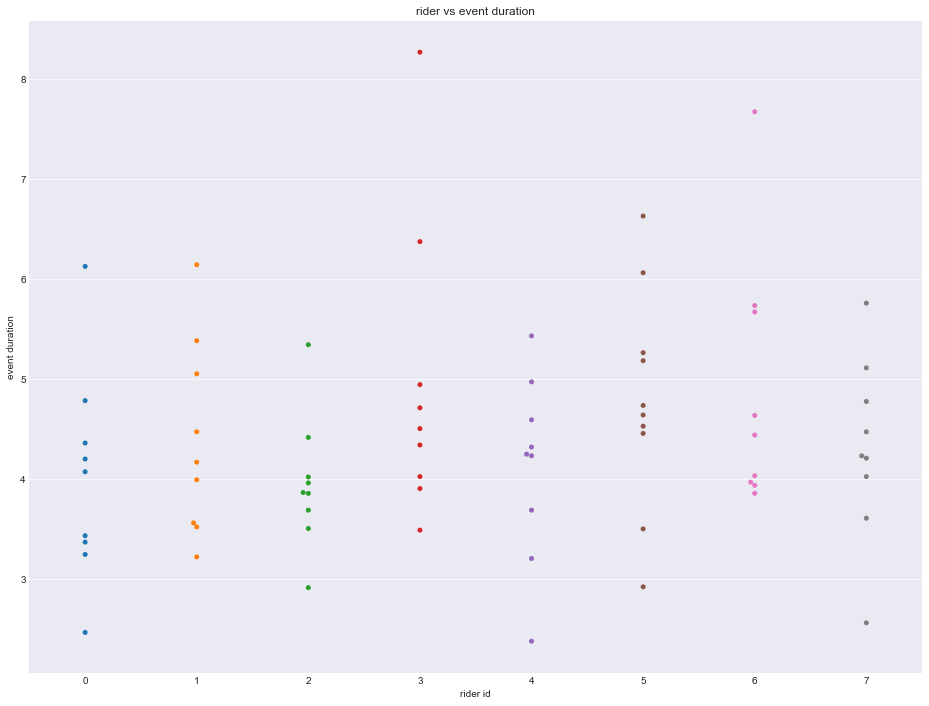

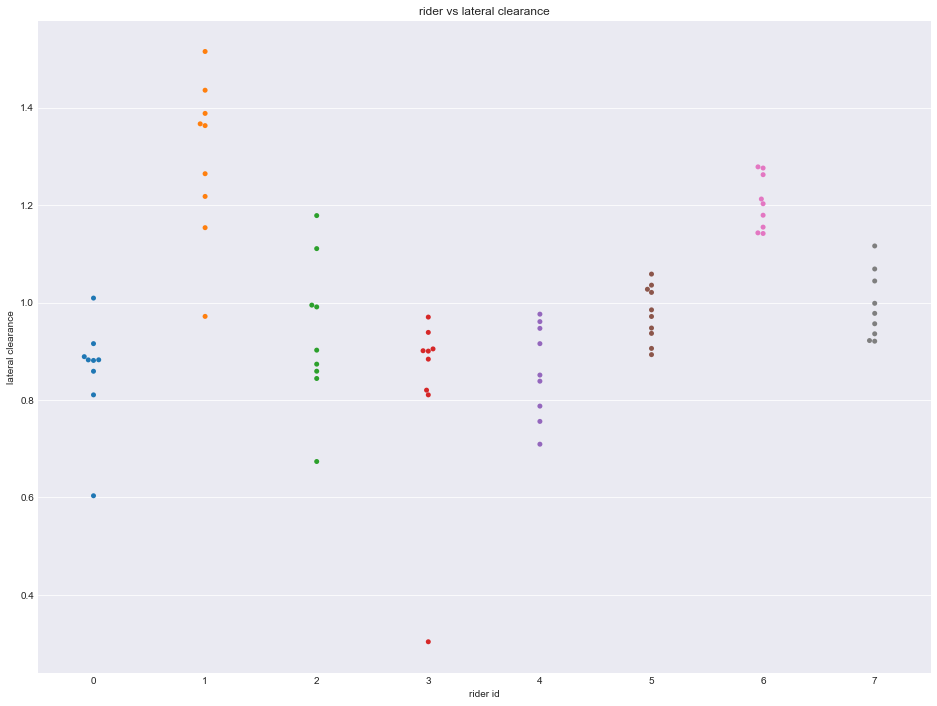

In [96]:
plt.close('all')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='starting velocity', data=df, ax=ax)
ax.set_title('rider vs starting velocity')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='event amplitude', data=df, ax=ax)
ax.set_title('rider vs event amplitude')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='event duration', data=df, ax=ax)
ax.set_title('rider vs event duration')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='lateral clearance', data=df, ax=ax)
ax.set_title('rider vs lateral clearance')

plt.show('all')

/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


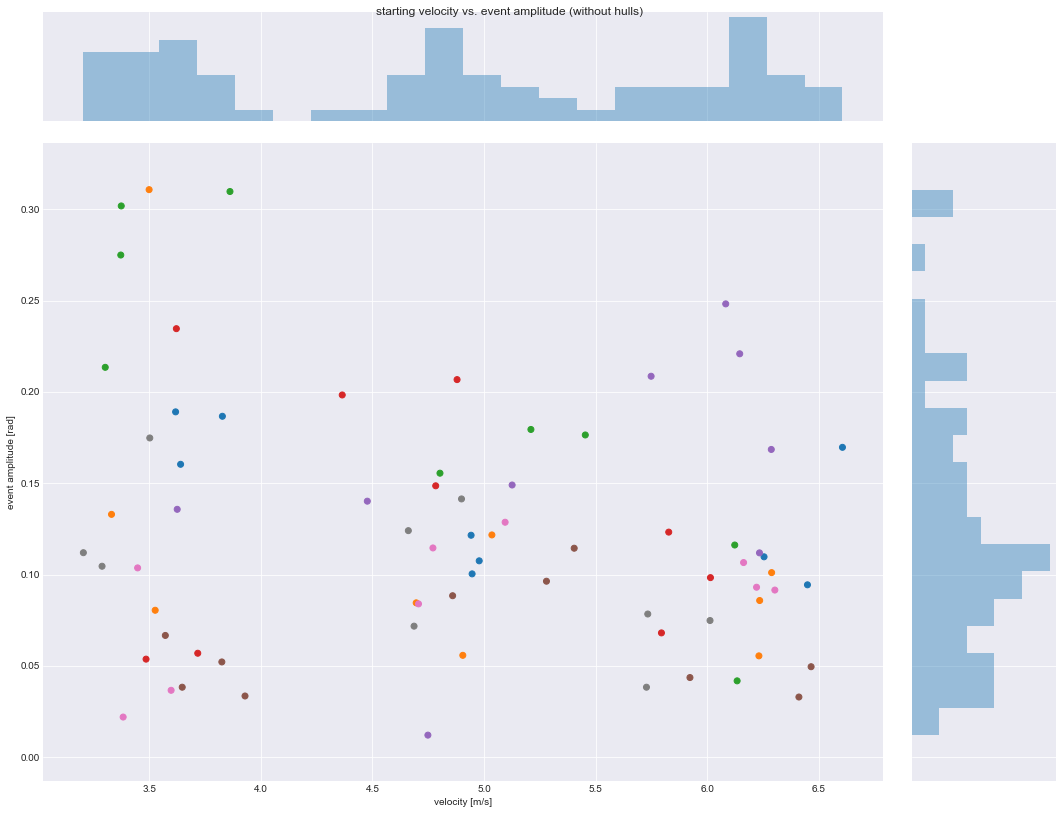

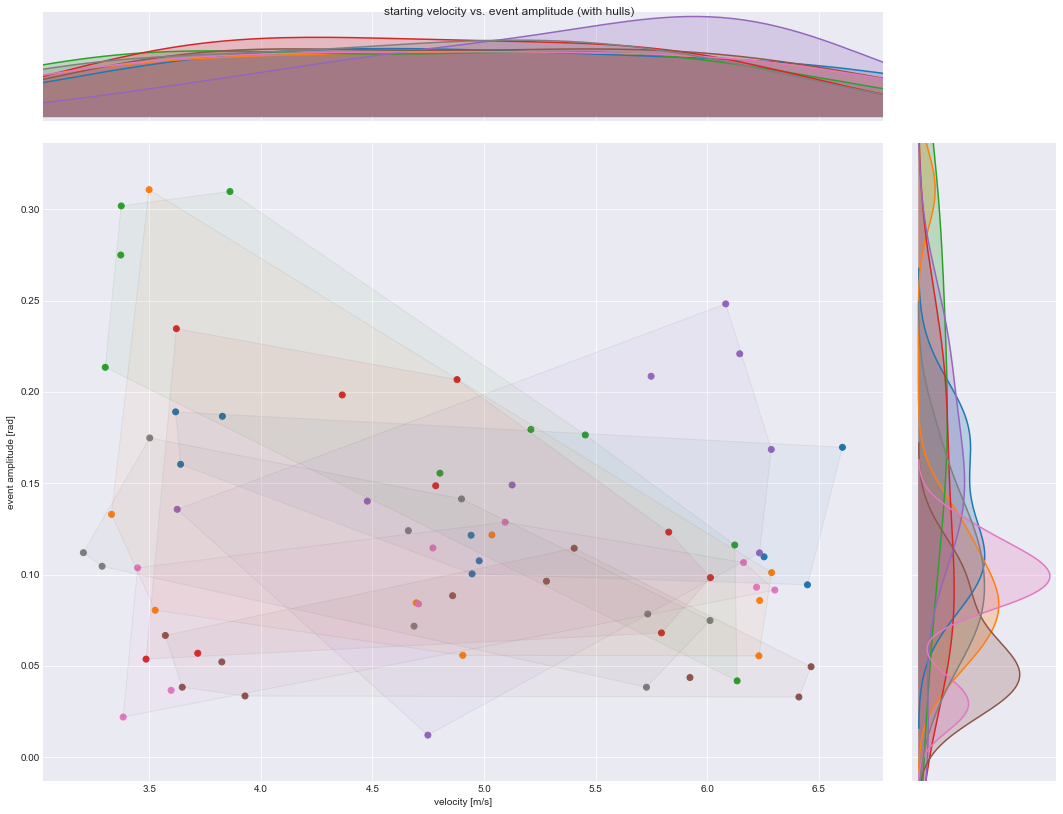

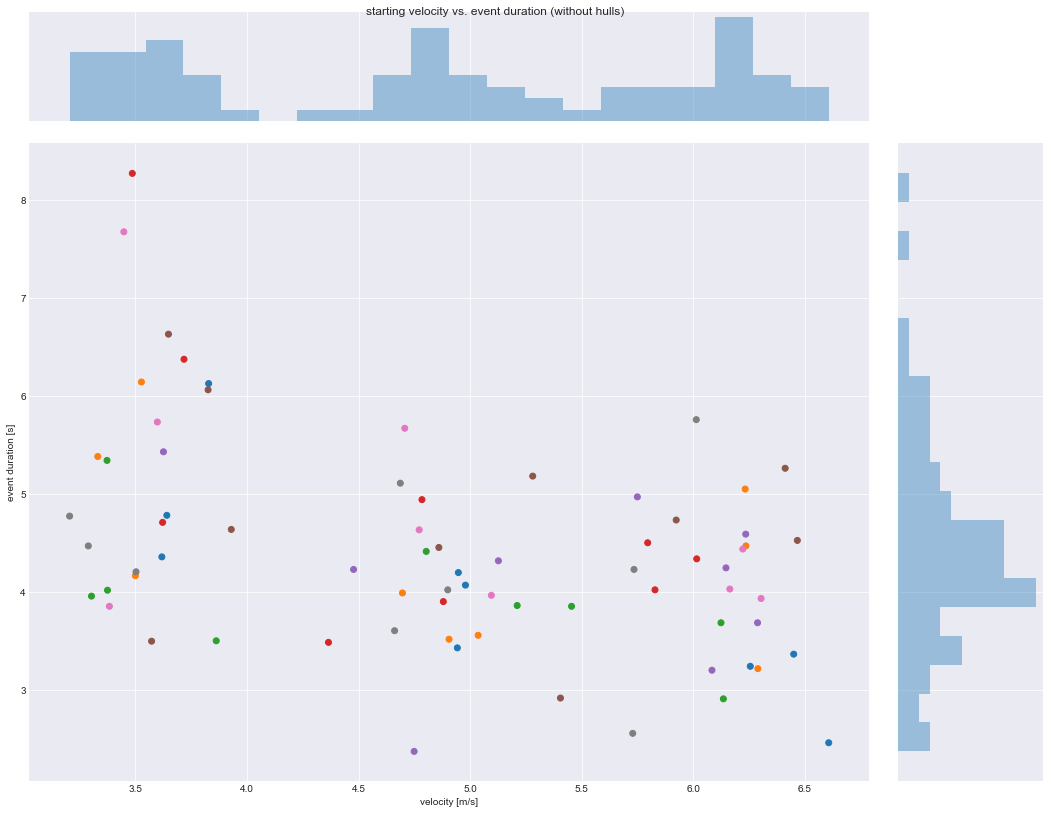

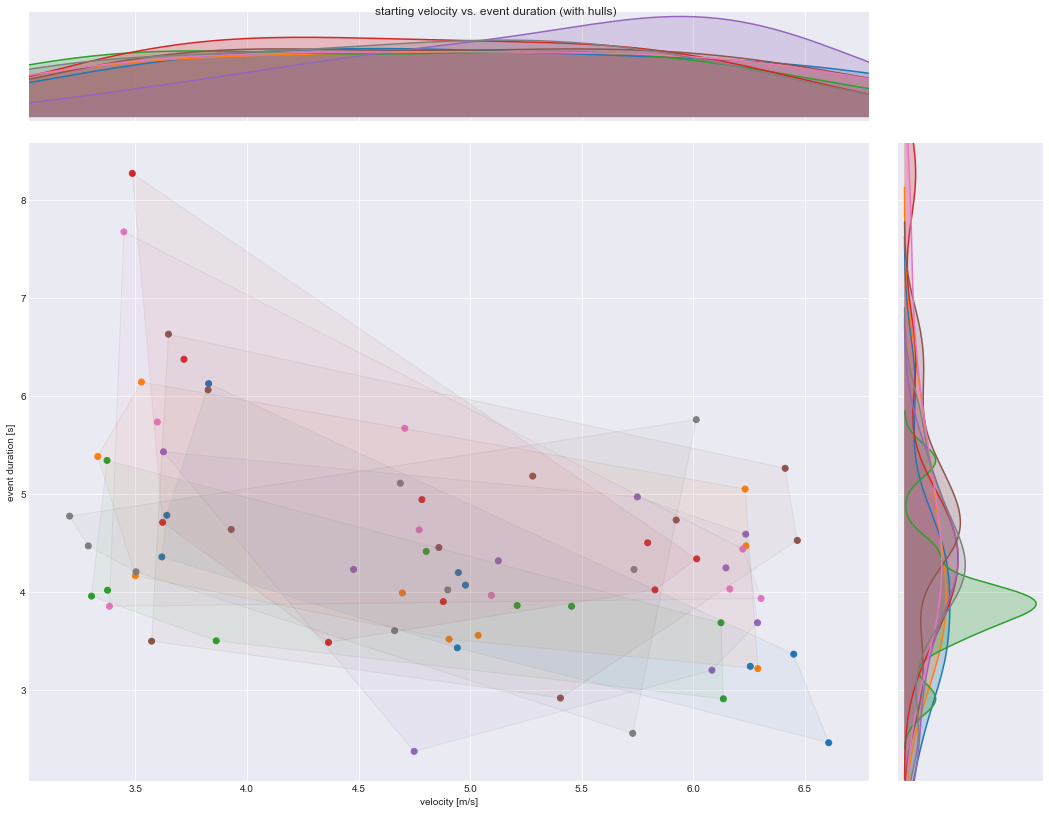

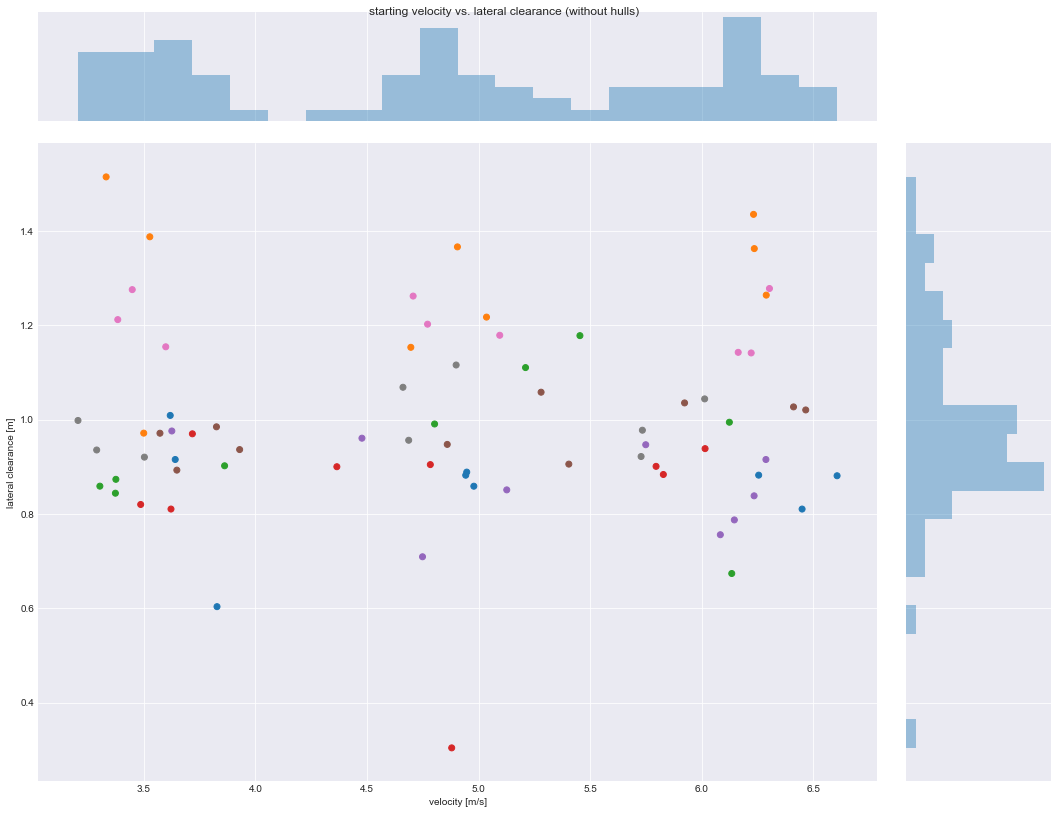

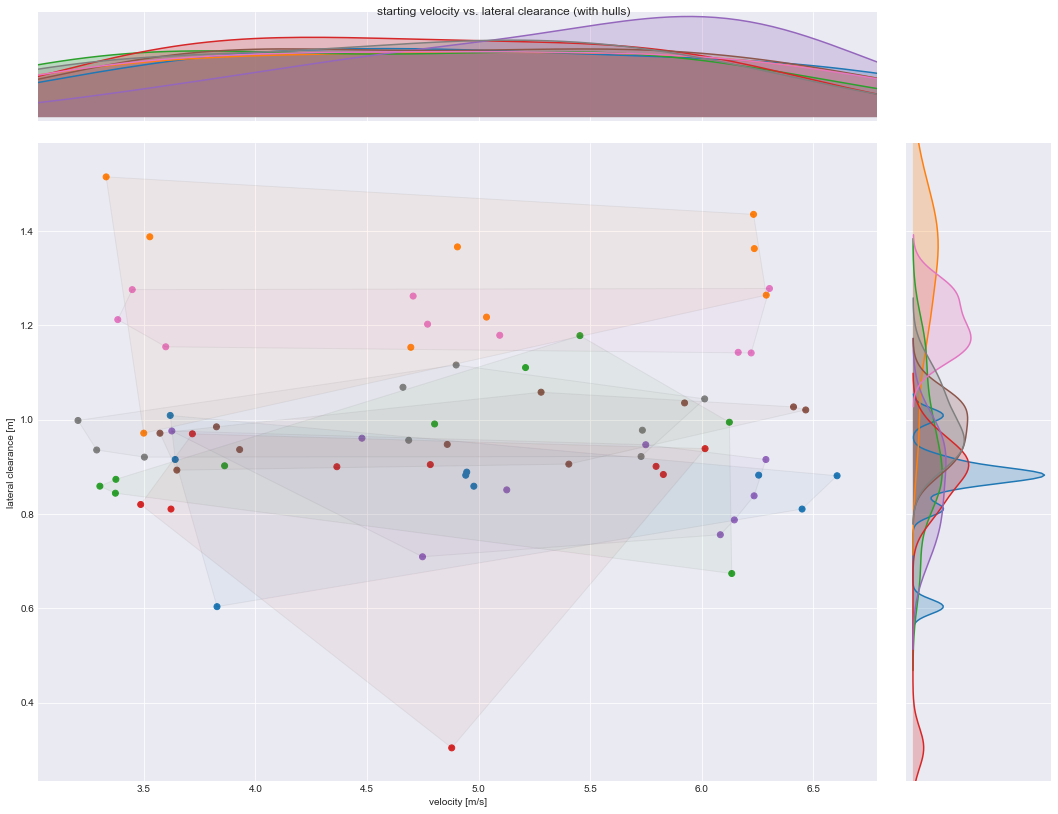

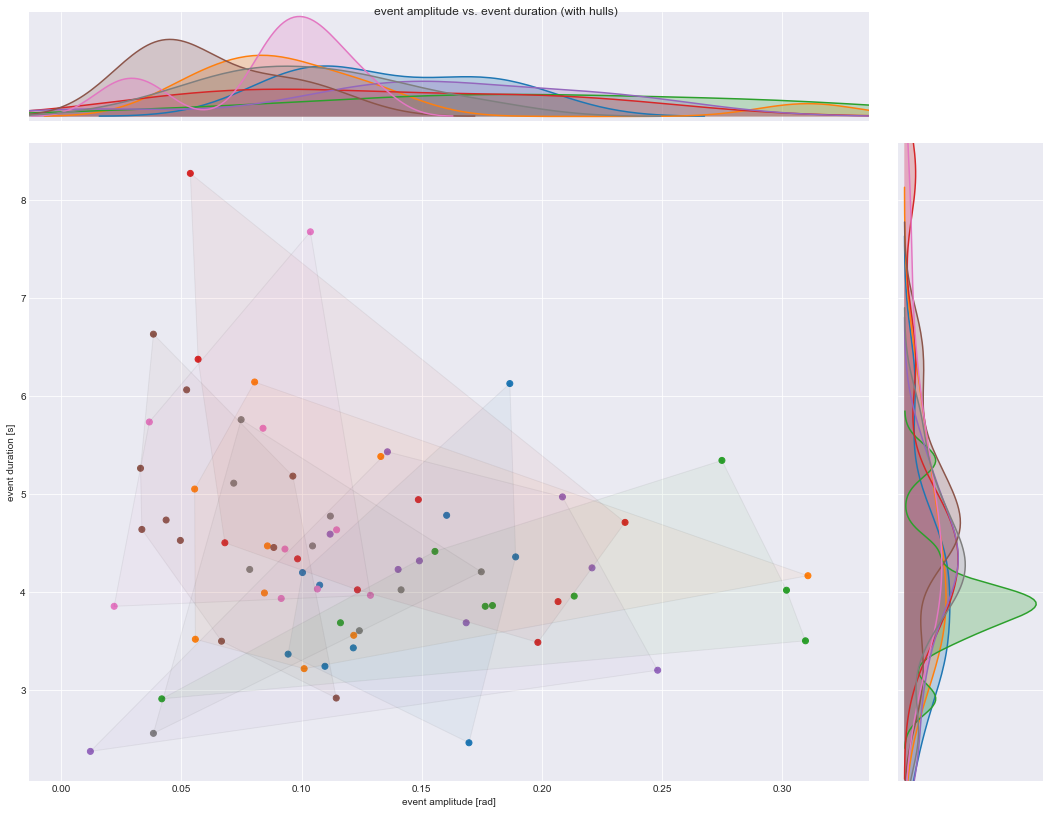

In [118]:
from antlia.plotdf import plotjoint, colormap

colors = sns.color_palette('tab10', 10)

plt.close('all')

g = plotjoint('starting velocity', 'event amplitude', df,
              color_map=colormap(df, 'rider id', colors),
              show_hull=False)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'event amplitude [rad]')
g.fig.suptitle('starting velocity vs. event amplitude (without hulls)')

g = plotjoint('starting velocity', 'event amplitude', df,
              kde_key=('rider id', colors),
              show_hull=True)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'event amplitude [rad]')
g.fig.suptitle('starting velocity vs. event amplitude (with hulls)')

g = plotjoint('starting velocity', 'event duration', df,
              color_map=colormap(df, 'rider id', colors),
              show_hull=False)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'event duration [s]')
g.fig.suptitle('starting velocity vs. event duration (without hulls)')

g = plotjoint('starting velocity', 'event duration', df,
              kde_key=('rider id', colors),
              show_hull=True)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'event duration [s]')
g.fig.suptitle('starting velocity vs. event duration (with hulls)')

g = plotjoint('starting velocity', 'lateral clearance', df,
              color_map=colormap(df, 'rider id', colors),
              show_hull=False)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'lateral clearance [m]')
g.fig.suptitle('starting velocity vs. lateral clearance (without hulls)')

g = plotjoint('starting velocity', 'lateral clearance', df,
              kde_key=('rider id', colors),
              show_hull=True)
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'lateral clearance [m]')
g.fig.suptitle('starting velocity vs. lateral clearance (with hulls)')

g = plotjoint('event amplitude', 'event duration', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('event amplitude [rad]', 'event duration [s]')
g.fig.suptitle('event amplitude vs. event duration (with hulls)')

plt.show()

In [102]:
import scipy.stats

for i in df['rider id'].unique():
    dfi = df[df['rider id'] == i]
    velocity = df['starting velocity'].values
    amplitude = df['event amplitude'].values
    duration = df['event duration'].values
    clearance = df['lateral clearance'].values
    
    print('\nrider {}, velocity vs. amplitude pearson: {:0.3f}, {:0.3f}'.format(
       i, *scipy.stats.pearsonr(velocity, amplitude)
    ))
    print('rider {}, velocity vs. duration pearson: {:0.3f}, {:0.3f}'.format(
       i, *scipy.stats.pearsonr(velocity, duration)
    ))
    print('rider {}, velocity vs. clearance pearson: {:0.3f}, {:0.3f}'.format(
       i, *scipy.stats.pearsonr(velocity, clearance)
    ))
    print('rider {}, duration vs. amplitude pearson: {:0.3f}, {:0.3f}'.format(
       i, *scipy.stats.pearsonr(duration, amplitude)
    ))
    

print('\noverall, velocity vs. amplitude pearson: {:0.3f}, {:0.3f}'.format(
    *scipy.stats.pearsonr(df['starting velocity'].values, df['event amplitude'].values)
))
print('overall, velocity vs. duration pearson: {:0.3f}, {:0.3f}'.format(
    *scipy.stats.pearsonr(df['starting velocity'].values, df['event duration'].values)
))
print('overall, velocity vs. clearance pearson: {:0.3f}, {:0.3f}'.format(
    *scipy.stats.pearsonr(df['starting velocity'].values, df['lateral clearance'].values)
))
print('overall, duration vs. amplitude pearson: {:0.3f}, {:0.3f}'.format(
    *scipy.stats.pearsonr(df['event duration'].values, df['event amplitude'].values)
))


rider 0, velocity vs. amplitude pearson: -0.211, 0.073
rider 0, velocity vs. duration pearson: -0.425, 0.000
rider 0, velocity vs. clearance pearson: 0.014, 0.904
rider 0, duration vs. amplitude pearson: -0.172, 0.146

rider 1, velocity vs. amplitude pearson: -0.211, 0.073
rider 1, velocity vs. duration pearson: -0.425, 0.000
rider 1, velocity vs. clearance pearson: 0.014, 0.904
rider 1, duration vs. amplitude pearson: -0.172, 0.146

rider 2, velocity vs. amplitude pearson: -0.211, 0.073
rider 2, velocity vs. duration pearson: -0.425, 0.000
rider 2, velocity vs. clearance pearson: 0.014, 0.904
rider 2, duration vs. amplitude pearson: -0.172, 0.146

rider 3, velocity vs. amplitude pearson: -0.211, 0.073
rider 3, velocity vs. duration pearson: -0.425, 0.000
rider 3, velocity vs. clearance pearson: 0.014, 0.904
rider 3, duration vs. amplitude pearson: -0.172, 0.146

rider 4, velocity vs. amplitude pearson: -0.211, 0.073
rider 4, velocity vs. duration pearson: -0.425, 0.000
rider 4, veloc

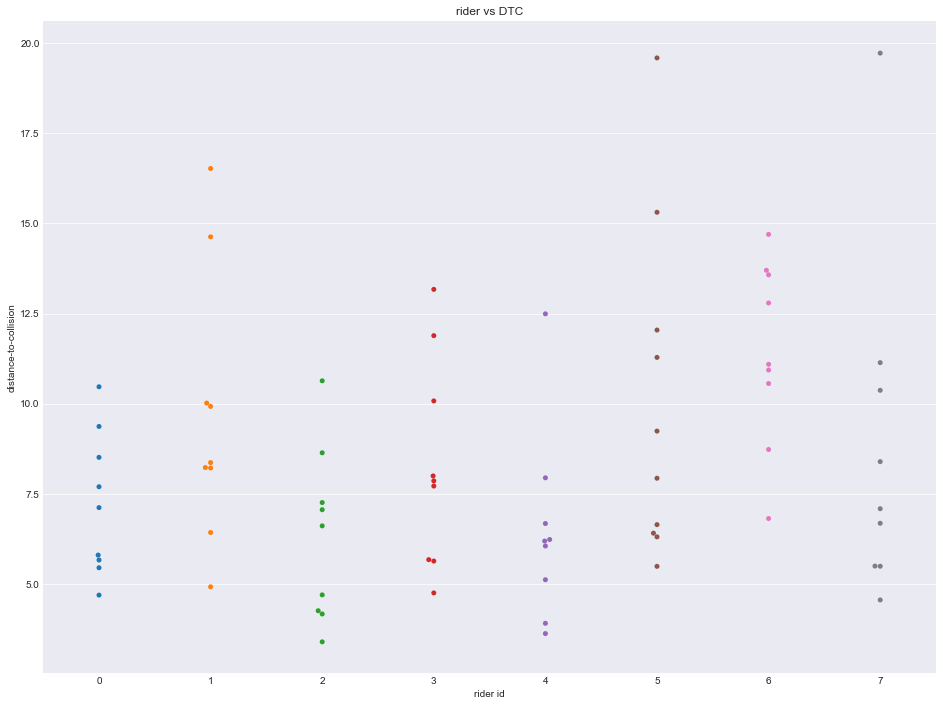

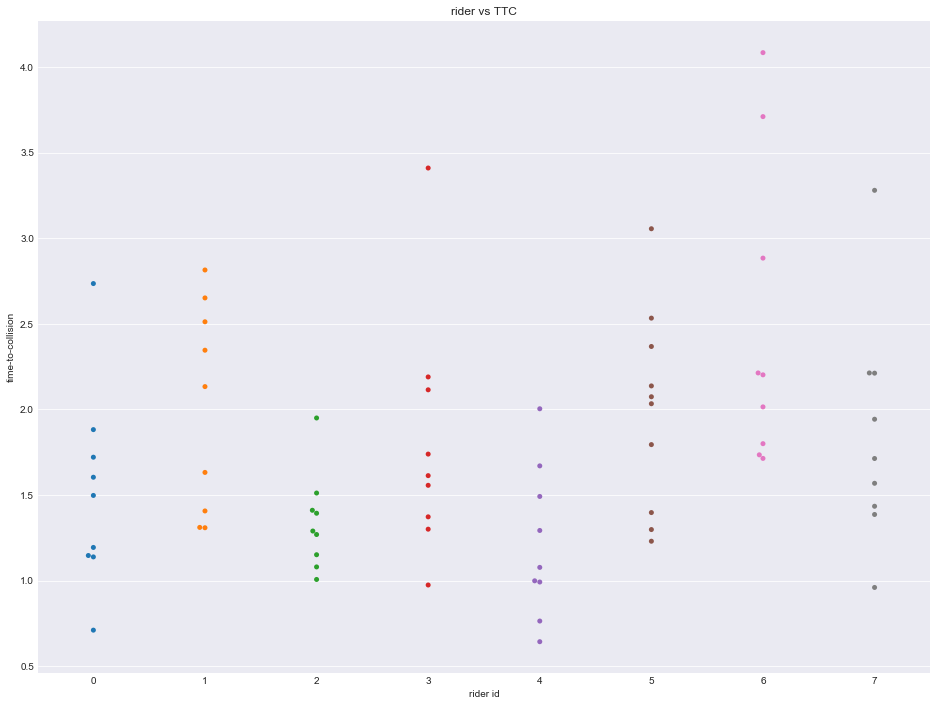

In [42]:
plt.close('all')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='distance-to-collision', data=df, ax=ax)
ax.set_title('rider vs DTC')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='time-to-collision', data=df, ax=ax)
ax.set_title('rider vs TTC')

plt.show()

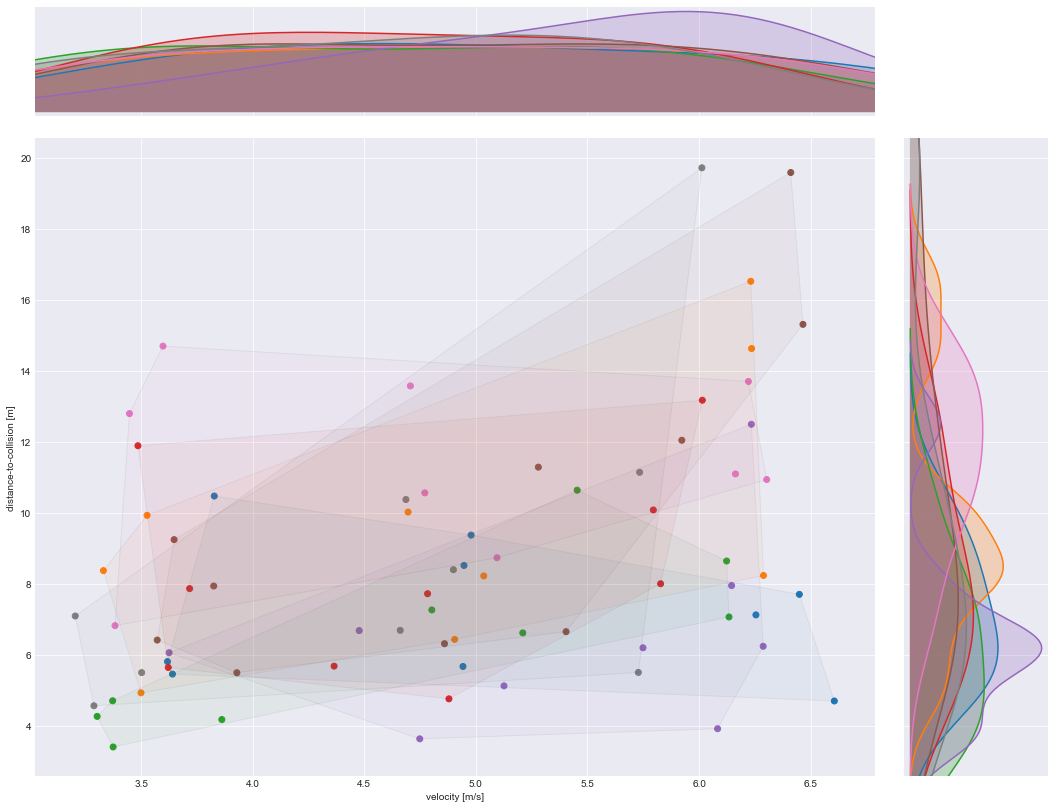

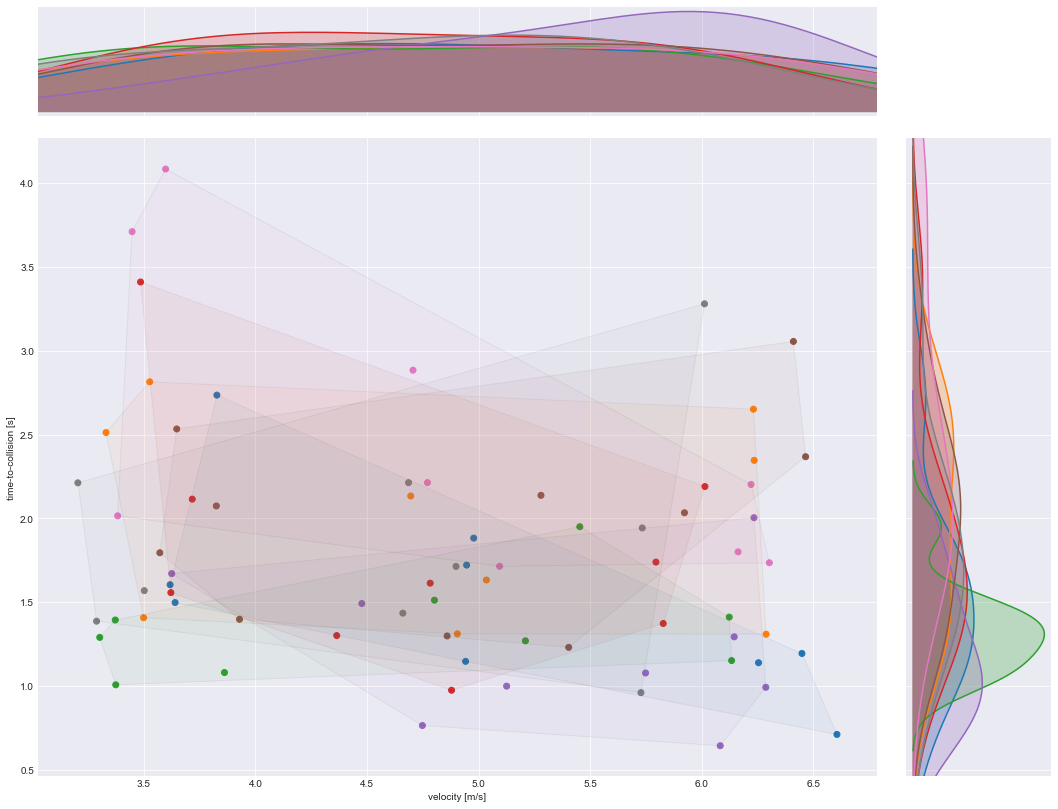

In [44]:
from antlia.plotdf import plotjoint

colors = sns.color_palette('tab10', 10)

plt.close('all')
g = plotjoint('starting velocity', 'distance-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'distance-to-collision [m]')

g = plotjoint('starting velocity', 'time-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'time-to-collision [s]')
plt.show()

/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


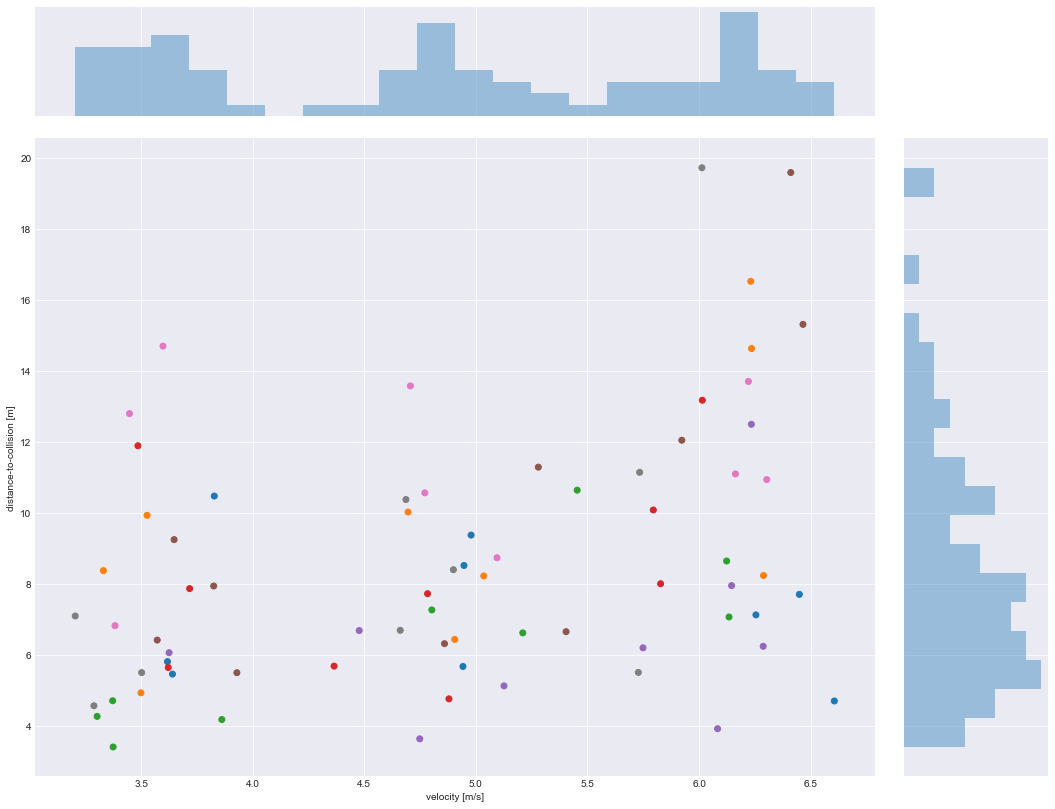

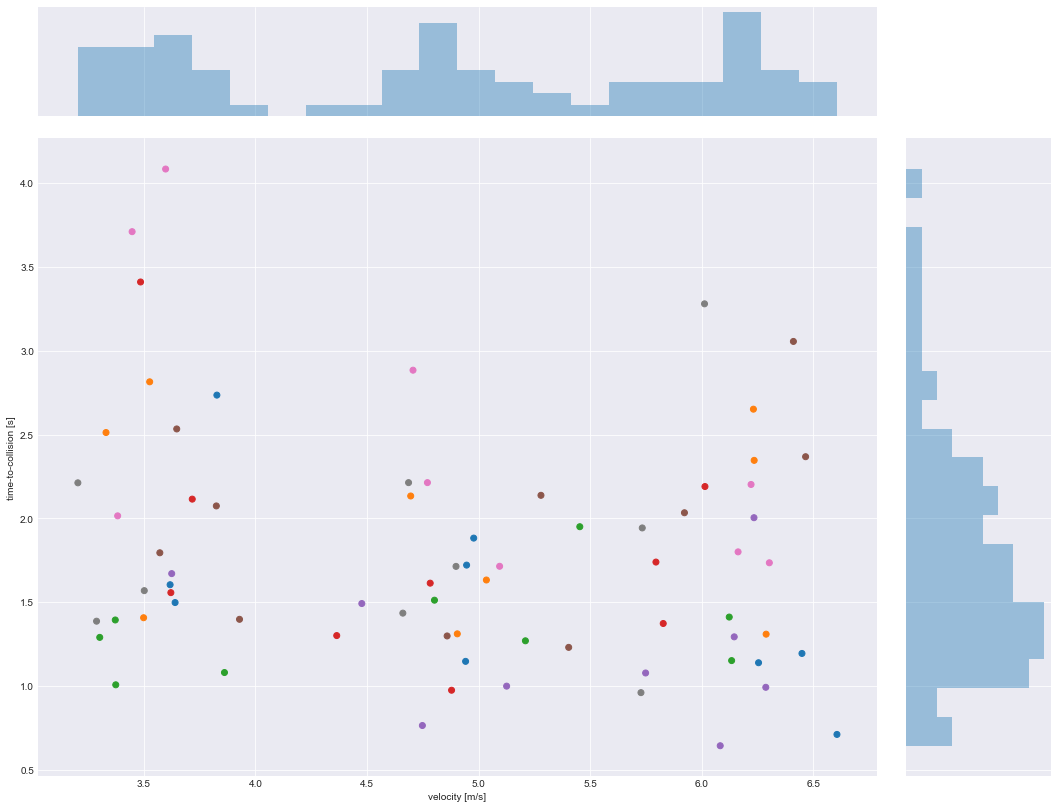

In [119]:
colors = sns.color_palette('tab10', 10)

plt.close('all')
g = plotjoint('starting velocity', 'distance-to-collision', df,
              color_map=colormap(df, 'rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'distance-to-collision [m]')

g = plotjoint('starting velocity', 'time-to-collision', df,
              color_map=colormap(df, 'rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'time-to-collision [s]')
plt.show()

In [103]:
df.to_pickle('trial2_steering_ttc.p.gz')